In [1]:
#IMPORTING LIBRARIES AND DATASET

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Position_Salaries.csv')

In [2]:
#SPLIT DATASET INTO DEPENDENT AND INDEPENDENT VARIABLES

x = dataset.iloc[:, 1 :-1].values
y = dataset.iloc[:, -1].values
# print(x)    #vertical array
# print(y)    #horizontal array
y = y.reshape(len(y), 1)     #reshape Y to be vertical 2D array
# print(y)

In [3]:
#FEATURE SCALING

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
#Different Scaler needed because we fit the model to the Scaler
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [4]:
#TRAIN SVR MODEL ON DATASET

from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/Users/zimi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [5]:
#PREDICT NEW RESULT

scaled_prediction = regressor.predict(sc_x.transform([[6.5]]))     #scale the value to the scale of X
scaled_res = sc_y.inverse_transform([scaled_prediction])     #scale the prediction to the scale of Y
print(scaled_res)


[[170370.0204065]]


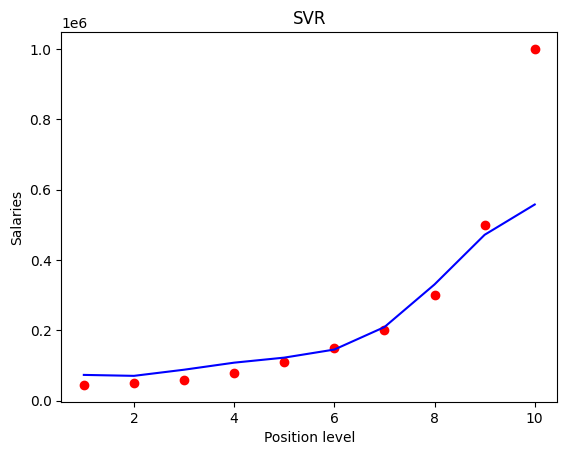

In [6]:
#VISUALISE RESULTS OF SVR

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color='blue')
plt.title('SVR')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()

/var/folders/41/qb82_0811d3b28gjxdp6y17c0000gn/T/ipykernel_38083/2276144092.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.01)


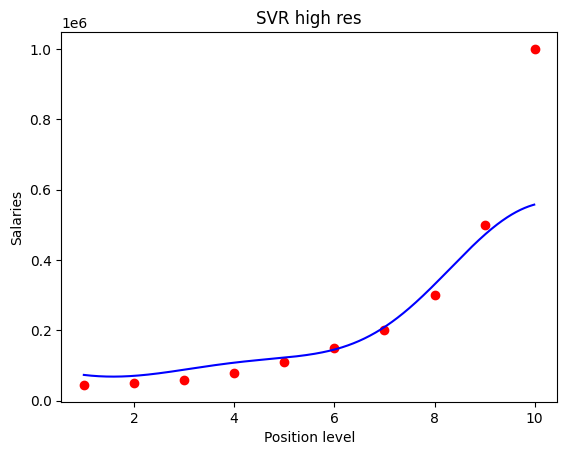

In [7]:
#VISUALISE SVR RESULT SMOOTHER

x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color='blue')
plt.title('SVR high res')
plt.xlabel('Position level')
plt.ylabel('Salaries')
plt.show()